<a href="https://colab.research.google.com/github/shadowpeasant/aiup/blob/main/day2-pm/lab2/day2pm_lab2_colab_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.nyp.edu.sg/content/dam/nyp/logo.png" width='200'/>

Welcome to the lab! Before we get started here are a few pointers on Jupyter notebooks.

1. The notebook is composed of cells; cells can contain code which you can run, or they can hold text and/or images which are there for you to read.

2. You can execute code cells by clicking the ```Run``` icon in the menu, or via the following keyboard shortcuts ```Shift-Enter``` (run and advance) or ```Ctrl-Enter``` (run and stay in the current cell).

3. To interrupt cell execution, click the ```Stop``` button on the toolbar or navigate to the ```Kernel``` menu, and select ```Interrupt ```.


# Lab 2 - Sentiment Analysis with Deep Learning (Keras)

Now that we have learn how to use Naive Bayes and SVM to classify sentiments in a document of text, let's now learn how to use Deep Learning to do the same.

In [5]:
!wget https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day2-pm/lab2/lab2.zip
!wget https://raw.githubusercontent.com/nyp-sit/aiup/main/day2-pm/lab2/helpers.py

!unzip lab2.zip

from helpers import *
print ("Import helpers complete.")

--2023-11-17 05:59:42--  https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/aiup/day2-pm/lab2/lab2.zip
Resolving nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)... 52.219.129.31, 3.5.147.122, 52.219.125.35, ...
Connecting to nyp-aicourse.s3-ap-southeast-1.amazonaws.com (nyp-aicourse.s3-ap-southeast-1.amazonaws.com)|52.219.129.31|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 320983372 (306M) [application/zip]
Saving to: ‘lab2.zip.2’

lab2.zip.2          100%[===================>] 306.11M  21.2MB/s    in 15s     

2023-11-17 05:59:58 (19.9 MB/s) - ‘lab2.zip.2’ saved [320983372/320983372]

--2023-11-17 05:59:58--  https://raw.githubusercontent.com/nyp-sit/aiup/main/day2-pm/lab2/helpers.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP r

## Section 2.1 - Load Data from CSV

Update the following code below to load the training and test data from the CSV files.


In [6]:
# TODO:
# Update the code below to indicate the correct file names, the columns used
# input text, and the output label class, and some maximum limits
#
load_text_data_from_csv(
    "data/train.csv",                           # The training CSV file
    "data/test.csv",                           # The test CSV file
    "review",                           # The column in the CSV used as the input text
    "sentiment")                           # The column in the CSV used as the output classification label

Loading training data...
Loading test data...
Complete.


Run the following cell to see how the data loaded from the CSV files look like, when it's stored in Python variables.

In [7]:
display_trainx_trainy()

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

## Section 2.2 - Build a Word Dictionary and Tokenize Text

Let's review the various stages in our Text Classification task using Deep Learning. The first step is to go through our text processing to tokenize a string of text into individual words. Then we convert each word into Word Embeddings. Next, we pass the sequence of words into a Recurrent Neural Network which then computes a series of features before sending that into a Fully Connected dense layer for classification.

<img src="https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/resources/day2-pm/textclass_dl.PNG" />

---

The following function creates a dictionary of n words, based the words that appeared in all the training data.

It also performs tokenization, which is a necessary step to split up a sentence into into words, and assigning a numeric identifier to the word.

With Scikit-Learn, the tokenization (as well as Lemmatization) is handled by the NLTK toolkit and integrated into the Scikit-Learn processing pipeline. But in the case of Keras, we have to handle that by ourselves. While lemmatization is beneficial in Classical Machine Learning algorithms, it's improvement to performance may be less significant in Deep Learning, depending on the written language that you are trying to classify. In our case, we will proceed to classify our movie reviews without lemmatizing the text.

Go ahead to run the cell below to build our dictionary and data set.

In [8]:
# Split and tokenize all the strings into individual word index
# in a dictionary.
#
# NOTE: If you want to this again, you must re-load the data from CSV in
#       in step 2.1.
#
build_dictionary_and_tokenize_data(
    50000,                                        # Max number of words in dictionary
    2500)                                        # Max number of words per sentence.

Initializing tokenizer...
Tokenizing training data...
  Max number of words in a sentence: 2442
Tokenizing test data...
  Max number of words in a sentence: 2318
Complete.


Run the cell below to see how our sentences now look like.

You can see that each sentence has been converted into a series of numbers.

In [9]:
display_trainx_trainy()

[[   0    0    0 ...  125 4103  486]
 [   0    0    0 ... 1977   69  221]
 [   0    0    0 ...   63   16  350]
 ...
 [   0    0    0 ...    5  127  123]
 [   0    0    0 ...  258   55  151]
 [   0    0    0 ...   55   16   11]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


## Section 2.3 - Load the Glove Word Embeddings

Word Embeddings are a well-recognized way of representing the meaning of a word in Machine Learning. Thanks to the vast sources of written text on the internet today from written articles, news, Wikipedias, user-generated content on social media, we have amassed a huge corpus of language data useful in training and producing a machine-learned representation of words.

A few of the Word Embeddings that have been pre-trained and made available for download are the Glove and Word2Vec embeddings. These embeddings are basically a dictionary look-up that maps a word to a series of numbers.

For this exercise, we will use the Glove Embeddings available here: https://nlp.stanford.edu/projects/glove/

We have already downloaded the Glove Embeddings file to the **"data/glove.6B.200d.txt"**. Update the path to that file and run the cell to load it up.

In [11]:
# TODO:
# Set the path to the Glove Word Embedding file
#
load_glove_embedding("data/glove.6B.200d.txt")

Loading GloVe Word Embedding...
Complete.


Replace the ??? with any known English word, and run the following cell to see how a real word embedding looks like.

In [12]:
# TODO:
# Set any known English word to see its Word Embedding.
#
display_word_embedding("poor")

Index of word poor: 333
Word embedding:
[ 5.43020010e-01 -3.32870007e-01 -2.79540002e-01  6.20350003e-01
 -2.97069997e-01  1.08599998e-01 -8.95749986e-01  7.62070017e-03
 -2.41809994e-01  4.60869998e-01  3.44509989e-01  1.40929997e-01
  1.98520005e-01 -1.69070005e-01  7.61619985e-01  2.85650015e-01
 -3.16570014e-01 -2.64739990e-01  4.50519994e-02  1.70040003e-03
  3.05510014e-01  2.81520009e+00 -7.70349979e-01  3.92159998e-01
  1.24710001e-01 -1.97779998e-01  2.86430001e-01 -1.79150000e-01
 -6.25260025e-02  2.99809992e-01  5.23199975e-01 -1.52219996e-01
 -1.39449999e-01  9.24070001e-01  2.37739995e-01 -1.95140000e-02
 -6.10099994e-02 -6.73839986e-01 -6.15119994e-01 -4.89210010e-01
  8.95190015e-02  1.28859999e-02  3.81969996e-02  1.40849993e-01
 -1.47330001e-01 -2.01279998e-01  1.37160003e-01  7.29210004e-02
 -2.27070004e-01 -9.23380032e-02 -5.69769979e-01 -9.82960016e-02
 -7.20700026e-02 -4.14300002e-02 -3.88690010e-02 -4.69909996e-01
  2.06970006e-01  3.27540010e-01  2.83589989e-01 -

Humans can visualize nearby words if we wrote all of them in Post-Its and pasted them in a 2-dimensional flipchart. But in practice, we need more than 2 dimensions to capture meaning in a word. The Glove Embedding that we use captures 200 dimensions of numbers per word. We won't be able to visualize nearby words with a 200-dimension representation, but machines will have no problems computing distances of words represented with any number of dimensions.

By feeding the Word Embeddings of each word in a sentence to the Deep Learning model, we are essentially telling the Deep Learning model to make use of the meaning of each words in a paragraph to classify that paragraph.

Run the following cell with any word to see how the machine can determine the closest matching/meaning words with the help of the Glove Word Embedding look up.

In [14]:
# TODO:
# Set any word here and run the cell to see which word is
# close in meaning to the one you supplied.
#
display_nearby_words("good")

better                         3.507248
always                         3.640628
really                         3.705178
sure                           3.713096
well                           3.806234
way                            3.926139
kind                           3.962501
things                         3.969100
so                             3.977939
very                           4.029464


## Section 2.4 - Create the Deep Learning Text Classification Model

The following creates the Deep Learning model for our Text Classification task. A typical Recurrent Neural Network will look like the following:

<img src="https://nyp-aicourse.s3-ap-southeast-1.amazonaws.com/resources/day2-pm/we_rnn_dl.PNG" height="300">

The Word Embedding captures the meaning of the words, while the Recurrent Neural Network attempts to make sense of the order and position of the words.

---

In the cell below, we have some codes to create the above model architecture, with some hyper-parameters that you can change to alter the structure of the model and how the model learns.

For example, you may consider using GRU instead of LSTM, or you may choose to use a Bi-directional/Uni-directional model. A Uni-directional model takes in a sequence of words in the natural reading order. A Bi-directional model takes in a sentence in from first-to-last word and last-to-first word, allowing the model to capture contexts in both directions.

Update the hyper-parameters and then run the cell to create the model.

1. Recurrent Neural Network variant in the Recurrent Layer: **'lstm'**
2. Neurons in Recurrent Layer: **32**
2. Bi-directional: **True**
3. Optimizer: **'adam'**



In [20]:
# TODO:
# Update the hyper parameters before starting the training.
#
create_text_classifier_model_rnn(
    2,                                        # Number of classes to predict
    2500,                                     # Max number words per sentence
    'glove',                                  # Word Embedding                  ('glove' / 'new')
    'lstm',                                    # RNN variant                     ('rnn' / 'gru' / 'lstm')
    32,                                        # Neurons in RNN layer            (typically 16 to 1024)
    True,                                     # Use bi-directional RNN?         (False - Uni-directional / True - Bi-directional)
    'adam'                                     # Optimizer to learn              ('sgd' / 'adam')
)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2500, 200)         24850600  
                                                                 
 bidirectional (Bidirection  (None, 64)                59648     
 al)                                                             
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 24910378 (95.03 MB)
Trainable params: 59778 (233.51 KB)
Non-trainable params: 24850600 (94.80 MB)
_________________________________________________________________


## Section 2.5 - Train Your Model

Update the following parameters and then run the cell below to start the training.

1. Learning rate = **0.01** (for 'sgd' optimizer), **0.001** (for 'adam' optimizer)
2. Batch size = **100**,
3. Number of epochs = **5**

Take a look at the accuracy of your classifications on the test data and compare its F1-score with your classical Machine Learning models. Try to adjust some of the hyper-parameters above including the RNN variant, the number of neurons, using/not using bi-directional networks, using a different optimizer, changing the batch size and the number of epochs. The run Section 2.4 and 2.5 again to train.

Try experimenting with different combinations of hyper-parameters to see if you can achieve a good F1-score.

In [21]:
# TODO:
# Set the learning rate of the deep learning network
# A large learning rate helps to adjust quickly the network weights to the optimal
# goal, but it may also cause it to over-shoot its goal. A small learning rate
# causes the network to learn very slowly, but it may bring it to its nearest goal

set_learning_rate(0.001)


# TODO:
# Update the batch size, and the number of epochs to train.
#
train_text_classifier_model(
    100,                         # Batch size.
    5                          # Number of epochs/iterations to train this model.
    )

Epoch 1/5
400/400 [==============================] - 70s 154ms/step - loss: 0.5013 - accuracy: 0.7561 - val_loss: 0.4167 - val_accuracy: 0.8170
Epoch 2/5
400/400 [==============================] - 62s 155ms/step - loss: 0.3837 - accuracy: 0.8338 - val_loss: 0.3331 - val_accuracy: 0.8565
Epoch 3/5
400/400 [==============================] - 56s 140ms/step - loss: 0.3218 - accuracy: 0.8623 - val_loss: 0.3190 - val_accuracy: 0.8637
Epoch 4/5
400/400 [==============================] - 57s 142ms/step - loss: 0.2925 - accuracy: 0.8763 - val_loss: 0.2888 - val_accuracy: 0.8773
Epoch 5/5
400/400 [==============================] - 61s 152ms/step - loss: 0.2718 - accuracy: 0.8865 - val_loss: 0.2975 - val_accuracy: 0.8730


In [ ]:
## uncomment the following if GPU training is not available

# !wget https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/aiup/day2-pm/lab2/sentiment.model.zip
# !wget https://nyp-aicourse.s3.ap-southeast-1.amazonaws.com/aiup/day2-pm/lab2/train_history.pkl
# !unzip sentiment.model.zip
# load_pretrained()

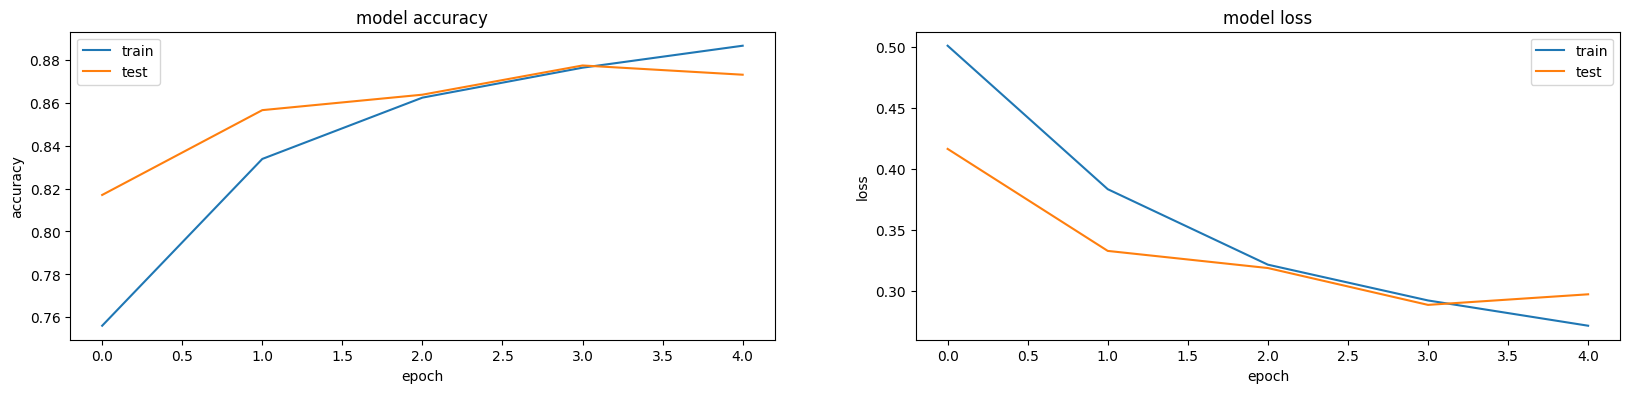

Evaluating classifier...
313/313 [==============================] - 16s 49ms/step


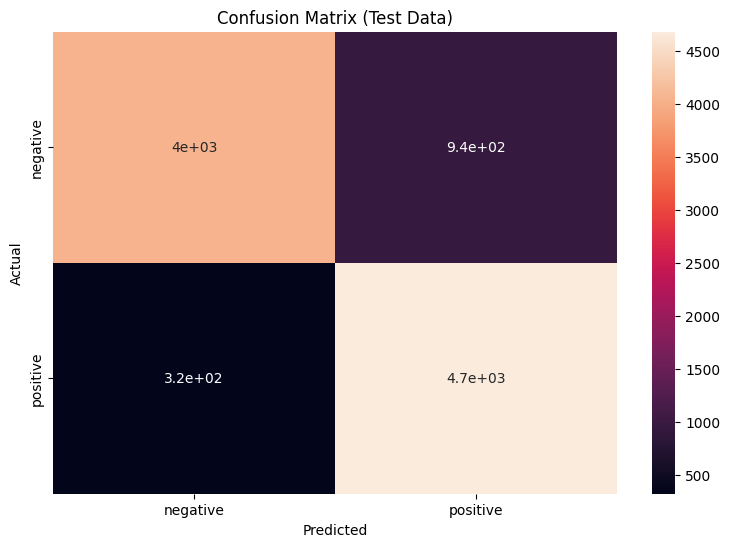

Test Data
--------------------------------------------------------
              precision    recall  f1-score   support

    negative       0.93      0.81      0.86      4993
    positive       0.83      0.94      0.88      5007

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



In [22]:
display_training_progress()
evaluate_model()

## Section 2.6 - Save Your Text Classification Model

Run the following code below to save your Text Classification model.


In [23]:
save_text_classifier_model("models/text_classifier.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Section 2.7 - Load Your Text Classification Model

Run the following code below to load your Text Classification model.


In [24]:
load_text_classifier_model("models/text_classifier.h5")

## Section 2.8 - Try Out Your Model

Run the following code to try your model.

Discuss how you feel about this new classifier:

1. Did the accuracy of your model performance increase with Deep Learning?
2. What do you think you can do to further improve the accuracy of your model?
3. How does the accuracy of your model feel when you are testing it manually?


In [30]:
print ("test it out:")
user_text = input()
classify_text(user_text)

test it out:
gerald tan jiale
You entered: gerald tan jiale
1/1 [==============================] - 0s 64ms/step
Classification result:
negative
0.552 - negative
0.448 - positive


## Section 2.9 - Explore helpers.py

Go ahead again to examine the codes in helpers.py to see how we create the Deep Learning model in Keras.